<h1>Linear_Regression_Abalone_201402438

In [57]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv(join('data','abalone.csv'))
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Whell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [59]:
df2 = pd.get_dummies(df)
cols = df2.columns.tolist()
for i in range(0,3):
    cols.insert(0, cols.pop(-1))
df2 = df2[cols]
print(df2.corr())
print(df2.dtypes)
print(df2.shape)

                   Sex_F     Sex_I     Sex_M    Length  Diameter    Height  \
Sex_F           1.000000 -0.464298 -0.512528  0.309666  0.318626  0.298421   
Sex_I          -0.464298  1.000000 -0.522541 -0.551465 -0.564315 -0.518552   
Sex_M          -0.512528 -0.522541  1.000000  0.236543  0.240376  0.215459   
Length          0.309666 -0.551465  0.236543  1.000000  0.986812  0.827554   
Diameter        0.318626 -0.564315  0.240376  0.986812  1.000000  0.833684   
Height          0.298421 -0.518552  0.215459  0.827554  0.833684  1.000000   
Whole weight    0.299741 -0.557592  0.252038  0.925261  0.925452  0.819221   
Shucked weight  0.263991 -0.521842  0.251793  0.897914  0.893162  0.774972   
Viscera weight  0.308444 -0.556081  0.242194  0.903018  0.899724  0.798319   
Whell weight    0.306319 -0.546953  0.235391  0.897706  0.905330  0.817338   
Rings           0.250279 -0.436063  0.181831  0.556720  0.574660  0.557467   

                Whole weight  Shucked weight  Viscera weight  W

In [60]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(df2.iloc[:,0:(df2.shape[1]-1)], df2.iloc[:,(df2.shape[1]-1)], test_size=0.3, random_state=123)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print('R2:', metrics.r2_score(tsty, lr_pred))

RMSE: 2.1895541889187164
R2: 0.5297829560039801


[129304.3125]


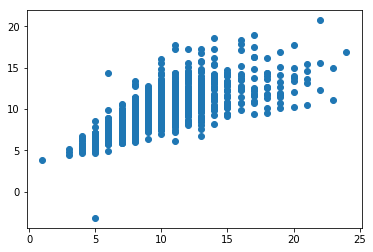

In [62]:
plt.scatter(x=tsty, y=lr_pred)
print(np.correlate(tsty, lr_pred))

In [63]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_lasso, tsty)))
print('R2:', metrics.r2_score(tsty, lr_pred_lasso))

RMSE: 3.1944175477599464
R2: -0.0008530958185830606


[123275.8296271]


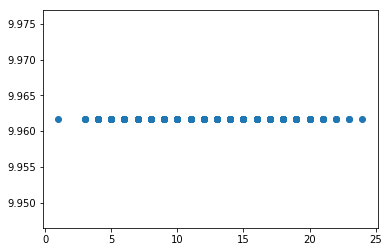

In [64]:
plt.scatter(x=tsty, y=lr_pred_lasso)
print(np.correlate(tsty, lr_pred_lasso))

In [65]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print('RMSE:', np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))
print('R2:', metrics.r2_score(tsty, lr_pred_ridge))

RMSE: 2.193974310244932
R2: 0.5278825561174342


[128832.80391851]


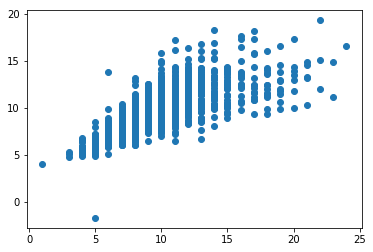

In [66]:
plt.scatter(x=tsty, y=lr_pred_ridge)
print(np.correlate(tsty, lr_pred_ridge))